In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Ejercico 2

In [74]:
from Ejercicio_2_practicos import analisis_predictivo
from Ejercicio_2_de_python import correr_encapsular

# Cargar el archivo con el separador correcto
df = pd.read_csv("Ejemplo_AD.csv", sep=";", header=None)
#print(df)

# Eliminar columnas que no se usan, siendo la primera y la ultima que tiene NaN
df = df.drop(df.columns[7], axis=1)
df = df.drop(df.columns[0], axis=1)

# Asignar nombres de columna
df.columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'Clase']


X = df[['V1', 'V2', 'V3', 'V4', 'V5']].values
y = df['Clase'].values

modelo = analisis_predictivo(X, y)
modelo.split_data()  # 20% para prueba

pred_lda_manual = modelo.predecir_lda()

pred_qda_manual = modelo.predecir_qda()

pred_nb_manual = modelo.predecir_naive_bayes()

#Funciones hechas por python
lda_pred, qda_pred, nb_pred = correr_encapsular()

Predicciones LDA manula: ['A' 'A' 'B' 'B' 'B' 'A']
Predicciones Naive Bayes manual: ['A' 'A' 'C' 'B' 'B' 'A']


### Comparación de modelos LDA:

In [35]:
print("Predicciones LDA manual:", pred_lda_manual)
print("Predicciones LDA :", lda_pred.tolist())

Predicciones LDA manual: ['A' 'A' 'B' 'B' 'B' 'A']
Predicciones LDA : ['A', 'A', 'B', 'B', 'B', 'A']


Se puede apreciar que tanto el algoritmo programado de LDA como el proporcionado por python realizaron la misma clasificación para esta base de datos, lo que se puede deber a que su fórmula analítica y simple tiende a producir resultados más consistentes.

### Comparació de modelos QDA

In [39]:
print("Predicciones QDA manual:", pred_qda_manual)
print("Predicciones QDA:", qda_pred.tolist())

Predicciones QDA manual: ['A' 'B' 'B' 'B' 'B' 'A']
Predicciones QDA: ['A', 'B', 'C', 'B', 'B', 'A']


Para el caso de QDA note que para la tercera observación del conjunto de prueba no coincide la clasificación, ya que el algoritmo hecho manualmente indica la clase 'B' y el de python indica 'C'. Esta diferenica se puede deber más que todo a problemas de calculo, ya que también se realiza una inversion de la matriz de varinaza pueden haber diferencias, pues numéricamente puede variar los resultados generados.

### Comparación de modelos Naive Bayes

In [49]:
print("Predicciones Naive Bayes manual:", pred_nb_manual)
print("Predicciones Naive Bayes:", nb_pred.tolist())

Predicciones Naive Bayes manual: ['A' 'A' 'C' 'B' 'B' 'A']
Predicciones Naive Bayes: ['A', 'A', 'C', 'B', 'B', 'A']


En el caso de Naive Bayes, ambas implementaciones coinciden en la mayoría de las predicciones, excepto por la tercera observación, donde el modelo manual predice 'C', mientras que el modelo de scikit-learn predice 'B'. Esta diferencia puede deberse a los distintos enfoques de redondeo o estabilidad numérica en el cálculo de la verosimilitud bajo el supuesto de independencia condicional. 

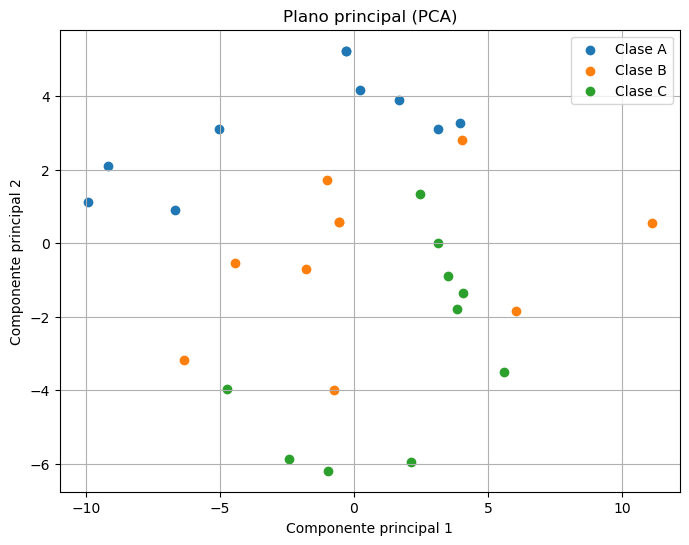

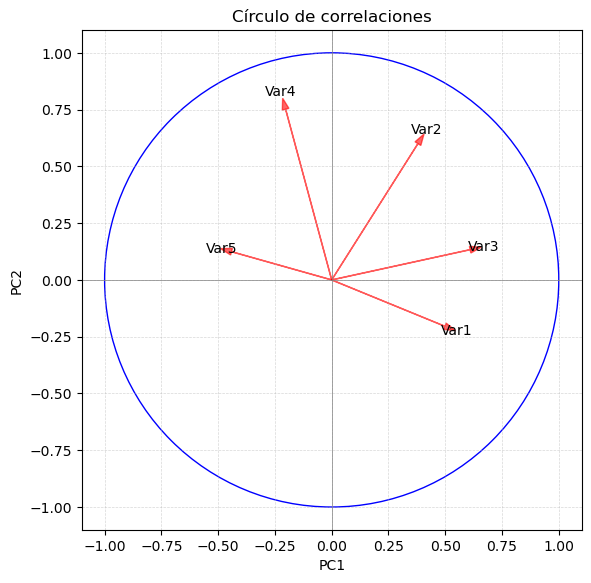

In [76]:
modelo.graficar_plano_principal()

modelo.graficar_circulo_correlaciones()  

# Ejercicio 4

In [65]:
from Ejercicio_4 import correr_ejer_4

y_test, lda_pred, qda_pred, naive_pred = correr_ejer_4()

from Ejercicio_4 import evaluar_metricas

# Obtener predicciones
# Evaluar
resultados = []
resultados.append(evaluar_metricas("LDA", y_test, lda_pred))
resultados.append(evaluar_metricas("QDA", y_test, qda_pred))
resultados.append(evaluar_metricas("Naive Bayes", y_test, naive_pred))


C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### Calculo de matrices de confusión

In [59]:
# LDA
matriz_lda = confusion_matrix(y_test, lda_pred)
print("Matriz de Confusión LDA:")
print(matriz_lda)

print("------------------------- \n")

# QDA
matriz_qda = confusion_matrix(y_test, qda_pred)
print("Matriz de Confusión QDA:")
print(matriz_qda)
print("------------------------- \n")

# Naive Bayes
matriz_naive = confusion_matrix(y_test, naive_pred)
print("Matriz de Confusión Naive Bayes:")
print(matriz_naive)

Matriz de Confusión LDA:
[[125  70]
 [ 51 323]]
------------------------- 

Matriz de Confusión QDA:
[[161  34]
 [133 241]]
------------------------- 

Matriz de Confusión Naive Bayes:
[[174  21]
 [164 210]]


A partir de las matrices de confusión, se observa que LDA presenta un buen balance general, con relativamente pocos errores en ambas clases. QDA mejora la clasificación de la clase 0 respecto a LDA, pero comete más errores al identificar la clase 1, lo cual puede estar relacionado con problemas numéricos en la inversión de las matrices de covarianza. Por otro lado, Naive Bayes muestra un sesgo hacia la clase 0, clasificándola con alta precisión, pero con un número mucho mayor de errores en la clase 1. Se concluye que LDA es el modelo más equilibrado para este conjunto de datos dado.

### Cálculo de Métricas

In [70]:
# Crear el Df con los resultados
df_resultados = pd.DataFrame(resultados)
df_resultados

,Modelo,Precisión Global,Error Global,Precisión Positiva (PP),Precisión Negativa (PN)
0,LDA,0.7836,0.2164,0.8219,0.7102
1,QDA,0.7637,0.2363,0.8764,0.5476
2,Naive Bayes,0.7740,0.2260,0.9091,0.5148


En los resultados de estas métricas también se confirma lo antes visto, de que LDA muestra los resultados más equilibrados, pues en general tiene mejor precisión global, menor error global y precisión negativa. Para el caso de presición positiva si se muestra que el modelo Naive Bayes clasifica de mejor manera y LDA de la peor, pero no difiren tanto como en las otras medidas de precisión.